# Gradient Descent : Weight Height Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv').head(100)

**Preparaing the data**

In [3]:
df['Weight'] = round(df['Weight']/2.2)
df['Height'] = round((df['Height']*2.54)/100,2)
df.head(3)

,Gender,Height,Weight
0,Male,1.88,110.0
1,Male,1.75,74.0
2,Male,1.88,97.0


In [4]:
X = df[['Weight']]
y = df[['Height']]

In [5]:
X

,Weight
0,110.0
1,74.0
2,97.0
3,100.0
4,94.0
...,...
95,75.0
96,88.0
97,82.0
98,79.0


In [6]:
n_rows = df.shape[0]

In [7]:
X = X.to_numpy().reshape(n_rows,1)

In [8]:
X[:5]

array([[110.],
       [ 74.],
       [ 97.],
       [100.],
       [ 94.]])

In [9]:
ones = np.ones((n_rows,1))
ones[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

**Rewriting X in terms $n x 2$ matrix**

In [10]:
X = np.concatenate((ones,X),axis=1)
X[:5]

array([[  1., 110.],
       [  1.,  74.],
       [  1.,  97.],
       [  1., 100.],
       [  1.,  94.]])

In [11]:
y=y.to_numpy().reshape(n_rows,1)
y[:5]

array([[1.88],
       [1.75],
       [1.88],
       [1.82],
       [1.77]])

In [12]:
X.shape, y.shape

((100, 2), (100, 1))

### Plotting Data

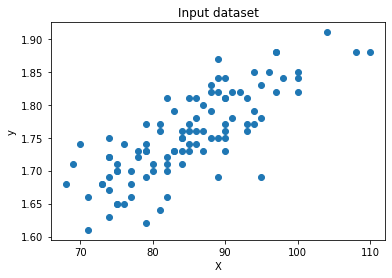

In [13]:
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');



### Cost Function

$J(θ_0​,θ_1​)=\frac{1}{2m}​\sum\limits_{i=1}^{m}(\hat{y}_{i} - y_{i})^2 = \frac{1}{2m}​\sum\limits_{i=1}^{m}(h_{\theta}(x_i) - y_{i})^2$

knowing that the general rule  for $h_\theta(x)$ gives :  
  
  $h_\theta(x) =  \theta^T X$



In [14]:
# So in Python
Theta = np.array([[0],[0]])
Theta

array([[0],
       [0]])

In [15]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    #theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    print(error_term)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [16]:
theta=np.array([[0],[0]])
theta=theta.reshape(2,1)
theta

array([[0],
       [0]])

In [36]:
np.dot(X,theta)[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [18]:
compute_cost(X,y)

[308.0128]


array([1.540064])

## Use Gradient Descent

Repeat the operations until convergence : 

$\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum_{i=1}^{m} [(h_{\theta}(x_{i}) - y_{i})x^{(0)}_{i}]$

$\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum_{i=1}^{m} [(h_{\theta}(x_{i}) - y_{i})x^{(1)}_{i}]$

### Translating  to python

* $\alpha$ : constant defined

* $m$ : size of the set

In [27]:
m = len(y)

* $(h_{\theta}(x_{i}) - y_{i})$ : error

In [28]:
error = (np.dot(X,theta) - y)

In [29]:
error[:5]

array([[-1.88],
       [-1.75],
       [-1.88],
       [-1.82],
       [-1.77]])

* $x^{(1)}_{i}$

In [37]:
X[:5]

array([[  1., 110.],
       [  1.,  74.],
       [  1.,  97.],
       [  1., 100.],
       [  1.,  94.]])

Turn the $x$ into a vector for scalar product

In [34]:
X[:,0].reshape(m,1)[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [39]:
X[:,1].reshape(m,1)[:5]

array([[110.],
       [ 74.],
       [ 97.],
       [100.],
       [ 94.]])

* $\sum_{i=1}^{m} [(h_{\theta}(x_{i}) - y_{i})x^{(1)}_{i}]$

In [38]:
sum(error*X[:,0].reshape(m,1))

array([-175.38])

<hr></hr><hr></hr><hr></hr>

In [46]:
def gradient_descent(X,y,theta=np.array([[0],[0]]),alpha=0.01,num_iterations=1500):
    
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        
        """ Error"""
        error = (np.dot(X,theta) - y)
        
        """ """
        term0 = (alpha/m) * sum(error*X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error*X[:,1].reshape(m,1))
        
        print("term0 : ",term0)
        print("term1 : ",term1)
        
        #update theta
        term_vector = np.array([[term0],[term1]])
        print("term vector : ",term_vector)
        
        """ Gradient Descent Equation """
        theta = theta - term_vector.reshape(2,1)
        print("Theta : ",theta)
        
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)
        
        

In [49]:
%%time
num_iterations=1500
theta_init=np.array([[1],[1]])
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,alpha, num_iterations)

term0 :  [0.841762]
term1 :  [72.244166]
term vector :  [[[ 0.841762]]

 [[72.244166]]]
Theta :  [[  0.158238]
 [-71.244166]]
[3.70158222e+09]
term0 :  [-60.5236258]
term1 :  [-5194.26853362]
term vector :  [[[  -60.5236258 ]]

 [[-5194.26853362]]]
Theta :  [[  60.6818638 ]
 [5123.02436762]]
[1.91350956e+13]
term0 :  [4351.57387606]
term1 :  [373461.65390224]
term vector :  [[[  4351.57387606]]

 [[373461.65390224]]]
Theta :  [[  -4290.89201226]
 [-368338.62953461]]
[9.89176687e+16]
term0 :  [-312872.92452187]
term1 :  [-26851443.28290551]
term vector :  [[[  -312872.92452187]]

 [[-26851443.28290551]]]
Theta :  [[  308582.03250961]
 [26483104.65337089]]
[5.11348644e+20]
term0 :  [22495186.584895]
term1 :  [1.93058644e+09]
term vector :  [[[2.24951866e+07]]

 [[1.93058644e+09]]]
Theta :  [[-2.21866046e+07]
 [-1.90410334e+09]]
[2.64338454e+24]
term0 :  [-1.61737683e+09]
term1 :  [-1.38806841e+11]
term vector :  [[[-1.61737683e+09]]

 [[-1.38806841e+11]]]
Theta :  [[1.59519023e+09]
 [1.3

<ipython-input-15-0d44a4e5d6a5>:16: RuntimeWarning: overflow encountered in square
  error_term = sum((h_x - y)**2)



Theta :  [[1.06438487e+154]
 [9.13478530e+155]]
[inf]
term0 :  [7.75923754e+155]
term1 :  [6.65914851e+157]
term vector :  [[[7.75923754e+155]]

 [[6.65914851e+157]]]
Theta :  [[-7.65279906e+155]
 [-6.56780065e+157]]
[inf]
term0 :  [-5.57879837e+157]
term1 :  [-4.7878476e+159]
term vector :  [[[-5.57879837e+157]]

 [[-4.78784760e+159]]]
Theta :  [[5.50227038e+157]
 [4.72216960e+159]]
[inf]
term0 :  [4.01108886e+159]
term1 :  [3.44240478e+161]
term vector :  [[[4.01108886e+159]]

 [[3.44240478e+161]]]
Theta :  [[-3.95606616e+159]
 [-3.39518309e+161]]
[inf]
term0 :  [-2.8839246e+161]
term1 :  [-2.47504759e+163]
term vector :  [[[-2.88392460e+161]]

 [[-2.47504759e+163]]]
Theta :  [[2.84436394e+161]
 [2.44109576e+163]]
[inf]
term0 :  [2.07350707e+163]
term1 :  [1.77952942e+165]
term vector :  [[[2.07350707e+163]]

 [[1.77952942e+165]]]
Theta :  [[-2.04506343e+163]
 [-1.75511846e+165]]
[inf]
term0 :  [-1.49082662e+165]
term1 :  [-1.27946023e+167]
term vector :  [[[-1.49082662e+165]]

 [[-

<ipython-input-46-ddebba2547ac>:16: RuntimeWarning: overflow encountered in add
  term1 = (alpha/m) * sum(error*X[:,1].reshape(m,1))
<ipython-input-46-ddebba2547ac>:26: RuntimeWarning: invalid value encountered in subtract
  theta = theta - term_vector.reshape(2,1)



term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[nan]]

 [[nan]]]
Theta :  [[nan]
 [nan]]
[nan]
term0 :  [nan]
term1 :  [nan]
term vector :  [[[n

In [48]:
theta

array([[5.42805927e+183],
       [4.65847999e+185]])